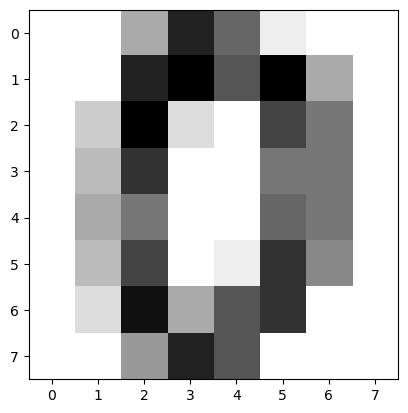

In [33]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [2]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

# 이미지를 평판화 n x sample x 8 8 => n_sample x 64

In [9]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [4]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)

X train : (1437, 64)
y train : (1437,)
X test : (360, 64)
y test : (360,)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


--- Logistic Regression Classifier ---
0.9611111111111111
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  1  1  1]
 [ 0  1  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  3]
 [ 0  0  0  0  2  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 1  1  0  0  0  1  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  1 29]]


C:\Users\procns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

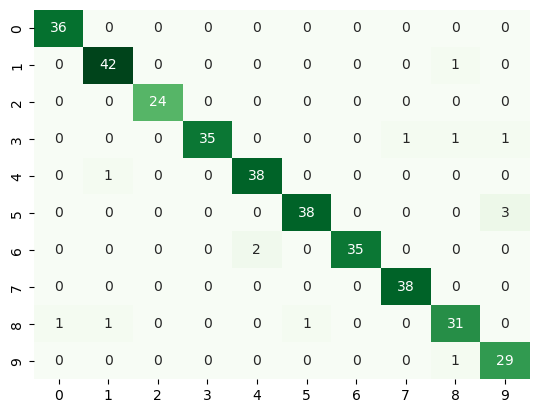

In [14]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

pred_lr = clf_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")


--- SVM Classifier ---
0.9888888888888889
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0  1 37  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  2]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  1  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0 30]]


<AxesSubplot:>

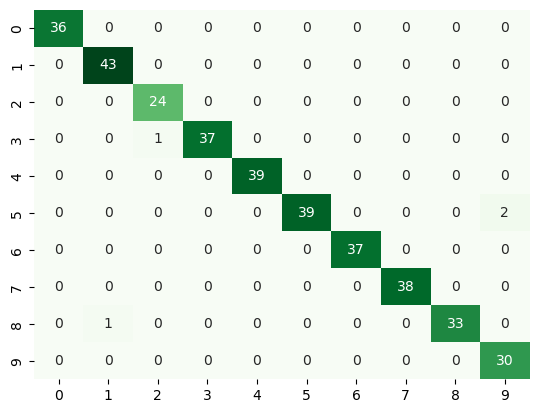

In [13]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

pred_svm = clf_svm.predict(X_test)
cm_svm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Greens",fmt="d")


--- Radom Forest ---
0.975
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0  1 36  0  0  0  0  1  0]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  1 37  0  0  0  3]
 [ 1  0  0  0  0  1 35  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  0  1  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0 30]]


<AxesSubplot:>

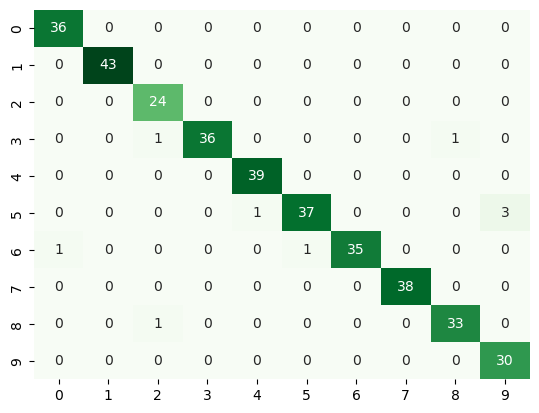

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred_rf))
print (confusion_matrix(y_test, pred_rf))

cm_rm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm_rm,cbar=False,annot=True,cmap="Greens",fmt="d")


--- DecisionTreeClassifier ---
0.8416666666666667
[[35  0  0  0  0  0  0  0  0  1]
 [ 0 34  0  2  2  0  0  2  2  1]
 [ 0  1 22  0  0  0  0  0  1  0]
 [ 0  0  4 31  0  0  0  0  0  3]
 [ 1  2  0  0 33  2  1  0  0  0]
 [ 0  0  2  1  1 32  0  0  2  3]
 [ 0  1  0  0  0  1 34  0  1  0]
 [ 0  0  0  1  0  0  0 35  0  2]
 [ 1  4  3  0  0  1  0  1 22  2]
 [ 0  1  2  0  0  0  0  2  0 25]]


<AxesSubplot:>

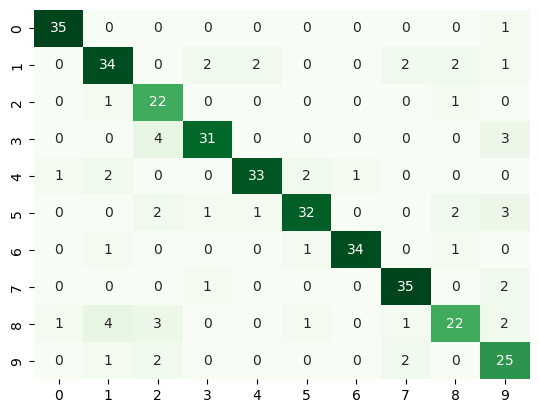

In [16]:
from sklearn.tree import DecisionTreeClassifier

print ("\n--- DecisionTreeClassifier ---")
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)
print(accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

cm_dt = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")

In [20]:
"-----------------------DL------------------------"

'-----------------------DL------------------------'

In [18]:
Y = pd.get_dummies(digits.target).values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [25]:
print("X train :", X_train.shape)
print("y train :", y_train.shape)
print("X test :", X_test.shape)
print("y test :", y_test.shape)
print("X val :", X_val.shape)
print("y val :", y_val.shape)

X train : (1149, 64)
y train : (1149, 10)
X test : (360, 64)
y test : (360, 10)
X val : (288, 64)
y val : (288, 10)


In [26]:
# Defining the model 
from keras import Input
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense

inputs = Input(shape = (64,))

x = Dense(128,activation='relu')(inputs)
x2 = Dense(64,activation='relu')(x)
x3 = Dense(64, activation = 'relu')(x2)
outputs = Dense(10, activation = 'softmax')(x3)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",metrics=["accuracy"]
             )

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________


In [29]:
#fitting the model and predicting 
# fit network
history=model.fit(x=X_train, y=y_train, epochs= 100, batch_size=32,validation_data= (X_val,y_val))

Epoch 1/100
36/36 [==============================] - 1s 12ms/step - loss: 1.1994 - accuracy: 0.6710 - val_loss: 0.4004 - val_accuracy: 0.8889
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.2918 - accuracy: 0.9086 - val_loss: 0.2636 - val_accuracy: 0.9201
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1572 - accuracy: 0.9521 - val_loss: 0.1856 - val_accuracy: 0.9514
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.9695 - val_loss: 0.2020 - val_accuracy: 0.9444
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0611 - accuracy: 0.9843 - val_loss: 0.1343 - val_accuracy: 0.9722
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.1184 - val_accuracy: 0.9722
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9896 - val_loss: 0.1162 - val_accuracy: 0.9722
Epoch 8/100


Epoch 58/100
36/36 [==============================] - 0s 4ms/step - loss: 3.0092e-06 - accuracy: 1.0000 - val_loss: 0.1781 - val_accuracy: 0.9757
Epoch 59/100
36/36 [==============================] - 0s 4ms/step - loss: 2.9347e-06 - accuracy: 1.0000 - val_loss: 0.1772 - val_accuracy: 0.9757
Epoch 60/100
36/36 [==============================] - 0s 4ms/step - loss: 2.8908e-06 - accuracy: 1.0000 - val_loss: 0.1774 - val_accuracy: 0.9757
Epoch 61/100
36/36 [==============================] - 0s 3ms/step - loss: 2.7954e-06 - accuracy: 1.0000 - val_loss: 0.1770 - val_accuracy: 0.9757
Epoch 62/100
36/36 [==============================] - 0s 3ms/step - loss: 2.7477e-06 - accuracy: 1.0000 - val_loss: 0.1772 - val_accuracy: 0.9757
Epoch 63/100
36/36 [==============================] - 0s 3ms/step - loss: 2.6769e-06 - accuracy: 1.0000 - val_loss: 0.1780 - val_accuracy: 0.9757
Epoch 64/100
36/36 [==============================] - 0s 3ms/step - loss: 2.6333e-06 - accuracy: 1.0000 - val_loss: 0.1778 -

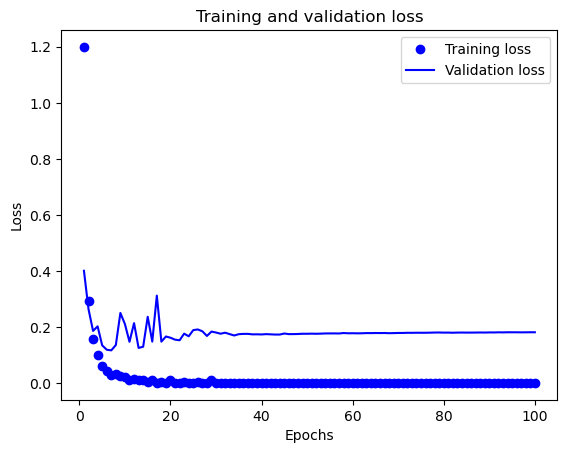

In [30]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [31]:
results = model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.0877 - accuracy: 0.9833


In [34]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

12/12 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.95      1.00      0.97        39
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        31
           4       0.95      1.00      0.97        36
           5       1.00      0.98      0.99        42
           6       1.00      1.00      1.00        38
           7       1.00      0.94      0.97        34
           8       1.00      0.94      0.97        33
           9       0.94      1.00      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1 41  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0

<AxesSubplot:>

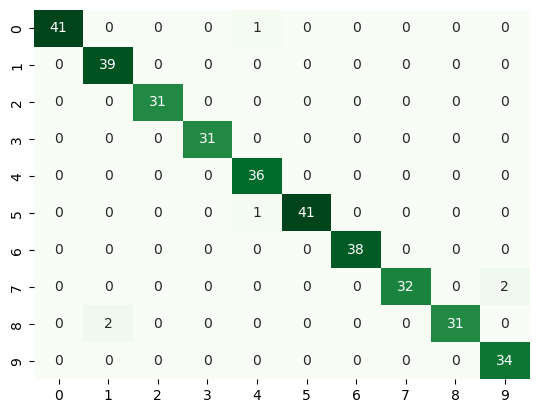

In [36]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

cm_dl = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm_dl,cbar=False,annot=True,cmap="Greens",fmt="d")

Precision(정밀도)

정밀도란 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율

 

Recall(재현율) 

재현율이란 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율



F1 score는 Precision과 Recall의 조화평균

F1 score는 데이터 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가